In [72]:
import numpy as np
x = np.array([1,2,3])
y = np.array([10,20,30,40])
np.meshgrid(x,y)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30],
        [40, 40, 40]])]

In [73]:
xx, yy = np.meshgrid(x,y)

In [74]:
print(xx.shape)
print(yy.shape)

(4, 3)
(4, 3)


(9, 10)
(9, 10)


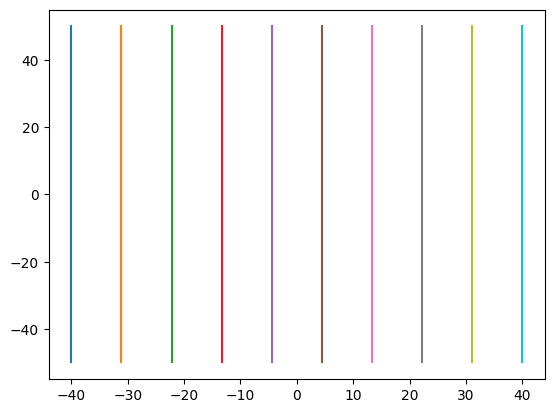

In [75]:
x = np.linspace(-40, 40, 10)
y = np.linspace(-50, 50, 9)

xx, yy = np.meshgrid(x,y)
print(xx.shape)
print(yy.shape)

plt.plot(xx,yy)
plt.show()

(90, 100)
(90, 100)


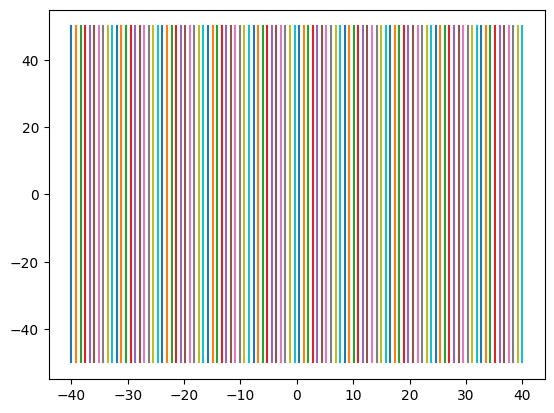

In [76]:
x = np.linspace(-40, 40, 100)
y = np.linspace(-50, 50, 90)

xx, yy = np.meshgrid(x,y)
print(xx.shape)
print(yy.shape)

plt.plot(xx,yy)
plt.show()

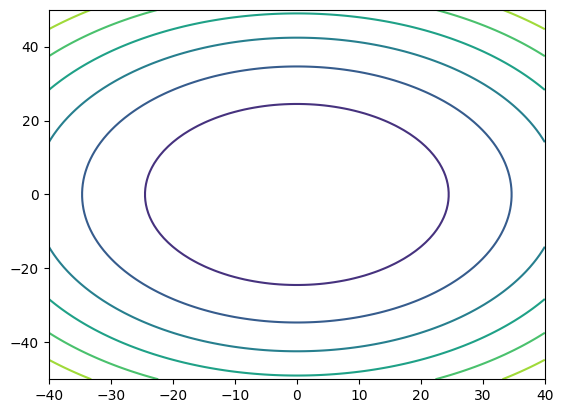

In [77]:
z = (xx**2) + (yy**2)
import matplotlib.pyplot as plt
plt.contour(xx,yy,z)

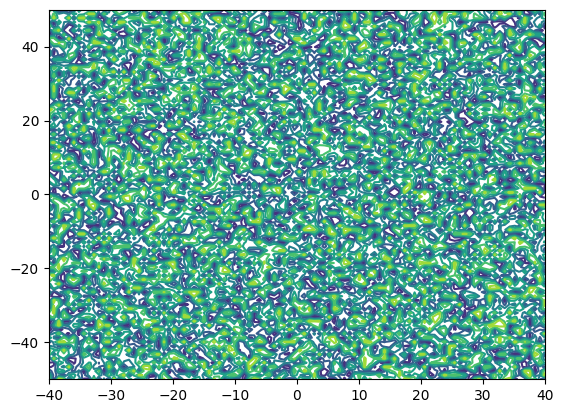

In [78]:
z1 = np.random.random((90,100))
plt.contour(xx,yy,z1)

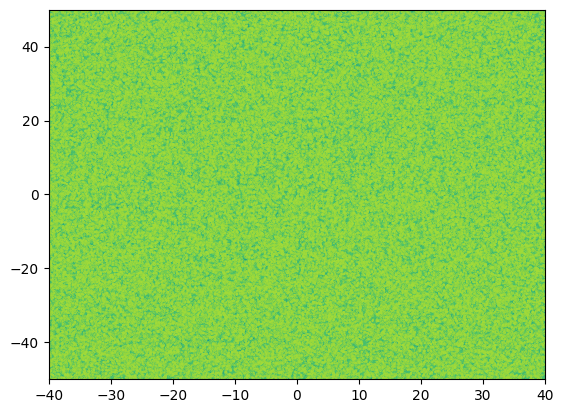

In [79]:
x = np.linspace(-40, 40, 1000)
y = np.linspace(-50, 50, 900)

xx, yy = np.meshgrid(x,y)
z1 = np.random.random((900,1000))
plt.contour(xx,yy,z1)

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
data=pd.read_csv('Social_Network_Ads.csv',)
data.drop(columns=['User ID','Gender'],inplace=True, axis=1)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [119]:
x=data.iloc[:,:2].values
y=data.iloc[:,-1].values
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)
print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (320, 2)
y_train :  (320,)
x_test :  (80, 2)
y_test :  (80,)


In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Train our model
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('y_train : ',y_train.shape)
print('y_pred : ',y_pred.shape)

y_train :  (320,)
y_pred :  (80,)


In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  8],
       [ 1, 22]])

In [125]:
# Creating a Meshgrid

a=np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)
b=np.arange(start=x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)

print(a.shape)
print(b.shape)

xx, yy = np.meshgrid(a,b)

(600,)
(597,)


In [126]:
print(xx.shape)
print(yy.shape)
print(xx.ravel().shape)
print(xx.ravel())
print(yy.ravel().shape)
print(yy.ravel())

(597, 600)
(597, 600)
(358200,)
[-2.89457875 -2.88457875 -2.87457875 ...  3.07542125  3.08542125
  3.09542125]
(358200,)
[-2.63231441 -2.63231441 -2.63231441 ...  3.32768559  3.32768559
  3.32768559]


In [127]:
# Classifiying every point on the meshgrid
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = knn.predict(input_array)
labels

array([0, 0, 0, ..., 1, 1, 1])

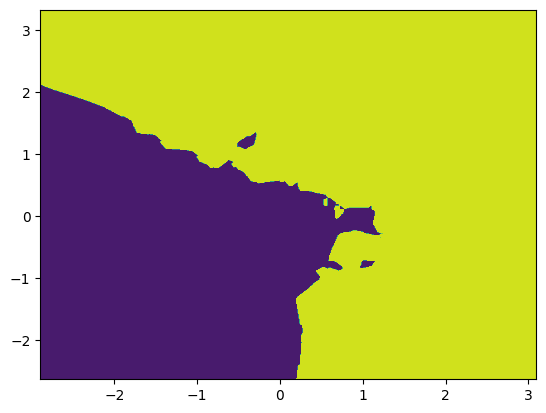

In [128]:
# Plotting the array as an image
plt.contourf(xx,yy,labels.reshape(xx.shape))

In [129]:
# Plotting all the training data on the plot
xx.shape

(597, 600)

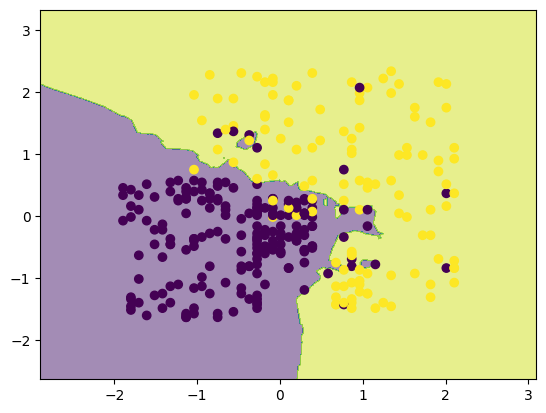

In [130]:
plt.contourf(xx,yy,labels.reshape(xx.shape), alpha=0.5)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)